# Binary Classification

## Load Dataset from sklearn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [9]:
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Convert to Pytorch Tensor

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [16]:
type(df.values)

numpy.ndarray

In [ ]:
df.values[:

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [19]:
data = torch.from_numpy(df.values).float()
data.shape

torch.Size([569, 31])

In [ ]:
data

tensor([[1.7990e+01, 1.0380e+01, 1.2280e+02,  ..., 4.6010e-01, 1.1890e-01,
         0.0000e+00],
        [2.0570e+01, 1.7770e+01, 1.3290e+02,  ..., 2.7500e-01, 8.9020e-02,
         0.0000e+00],
        [1.9690e+01, 2.1250e+01, 1.3000e+02,  ..., 3.6130e-01, 8.7580e-02,
         0.0000e+00],
        ...,
        [1.6600e+01, 2.8080e+01, 1.0830e+02,  ..., 2.2180e-01, 7.8200e-02,
         0.0000e+00],
        [2.0600e+01, 2.9330e+01, 1.4010e+02,  ..., 4.0870e-01, 1.2400e-01,
         0.0000e+00],
        [7.7600e+00, 2.4540e+01, 4.7920e+01,  ..., 2.8710e-01, 7.0390e-02,
         1.0000e+00]])

In [22]:
x = data[:, :-1]
y = data[:, -1:]

x.size(), y.size()

(torch.Size([569, 30]), torch.Size([569, 1]))

In [23]:
# set Seperation ratio
ratios = [.7, .2, .1]

In [24]:
train_cnt = int(data.size(0) * ratios[0])
valid_cnt = int(data.size(0) * ratios[1])
test_cnt = data.size(0) - (train_cnt + valid_cnt)
cnts = [train_cnt, valid_cnt, test_cnt]

cnts

[398, 113, 58]

# shuffle and split

In [25]:
# 랜덤 index 배열 생성
indices = torch.randperm(x.size(0))
indices

tensor([491, 523, 291, 106, 185, 341, 431, 281, 486, 363,  94,  77, 506, 438,
        429, 112, 324, 497,  25,  83, 465, 347, 319, 473, 373, 405, 188, 218,
        303, 426, 537, 530, 512, 240, 329, 237,  42, 361, 342, 153, 284, 469,
        111,  67, 293, 152, 148, 108, 209,  79, 396, 116, 474, 165,  21, 180,
        135, 420, 364, 201, 129,  99, 415, 258, 480,  23,   7,  88,  27, 274,
         93, 372, 357,  85, 137,  57, 175, 105, 507,  59,  45, 412,  47, 436,
         98, 316, 229, 149,  52, 103, 242,  62, 213, 355, 338, 238, 304, 350,
        125, 151, 445, 134,  31, 376,  90, 519, 259, 560,  78, 484, 450, 127,
        567, 377, 246,  71, 288, 104,  11, 318, 292, 200, 130, 362,   6, 214,
          4,  32, 190, 311, 419, 437, 479, 196, 380, 140, 532, 444, 247, 374,
        408,  97, 109, 169, 502, 544, 330, 156, 440, 294, 164, 312, 195, 132,
        386, 257, 402, 524, 202,  39, 464, 118, 263, 546, 179, 273,  44, 493,
        471, 521, 283, 235, 289, 449, 508, 552, 528, 147, 295, 4

In [26]:
# 그 다음은 해당 배열을 원 데이터에 적용해야겠지
x = torch.index_select(x, dim=0, index=indices) # x 데이터에 row 방향으로 indices 배열로 재배열함
y = torch.index_select(y, dim=0, index=indices)

#cnts 값을 기준으로 split
x = x.split(cnts, dim=0)
y = y.split(cnts, dim=0) 

for x_i, y_i in zip(x, y):
    print(x_i.size(), y_i.size())

torch.Size([398, 30]) torch.Size([398, 1])
torch.Size([113, 30]) torch.Size([113, 1])
torch.Size([58, 30]) torch.Size([58, 1])


# 전처리!

In [29]:
scaler = StandardScaler() 
# training set에만 fit 적용
scaler.fit(x[0].numpy()) # sklearn은 tensor 타입에 대해서 작동하지 않은 것 같다. 반드시 numpy 타입으로 해줄 것

StandardScaler()

In [30]:
x = [ torch.from_numpy(scaler.transform(x[i].numpy())).float() for i in range(3)]

df = pd.DataFrame(x[0].numpy(), columns=cancer.feature_names)
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
393,-0.107759,1.378044,-0.124189,-0.168471,-0.091875,-0.358227,-0.006066,-0.065238,-0.704004,-0.581326,...,0.200314,1.572072,0.080491,0.091508,-0.272206,-0.394212,0.239450,0.079470,-0.380027,-0.582849
394,-0.148018,-1.249558,-0.154680,-0.272279,0.766242,0.225569,-0.372757,0.142829,-0.096023,0.452443,...,-0.256638,-1.202303,-0.334682,-0.347548,0.289522,-0.029551,-0.424174,0.315863,0.570572,0.497829
395,0.314966,1.560917,0.291418,0.213397,0.436197,-0.116563,0.475064,0.487466,-0.568102,0.216884,...,0.521874,1.236528,0.463447,0.347311,1.461251,-0.123339,0.671484,0.614877,-0.375076,0.560574
396,0.536394,1.130203,0.529504,0.401907,-0.855192,-0.068346,0.163524,0.169072,0.147170,-1.298772,...,0.168582,0.326467,0.183829,0.038029,-0.860265,-0.406673,-0.186053,-0.022288,-0.119273,-1.204700
397,-0.202656,-1.331370,-0.218588,-0.285113,-0.881876,-0.345932,-0.464333,-0.500385,-0.675393,-0.954183,...,-0.381454,-1.357799,-0.284533,-0.412613,-0.706667,0.092440,0.087233,-0.338053,-0.239748,-0.625986


## Build Model & Optimizer

In [42]:
model = nn.Sequential(
    nn.Linear(x[0].size(-1), 25),
    nn.LeakyReLU(),
    nn.Linear(25, 20),
    nn.LeakyReLU(),
    nn.Linear(20, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 10),
    nn.LeakyReLU(),
    nn.Linear(10, 5),
    nn.LeakyReLU(),
    nn.Linear(5, y[0].size(-1)),
    nn.Sigmoid(),
)

model

Sequential(
  (0): Linear(in_features=30, out_features=25, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=25, out_features=20, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=20, out_features=15, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=15, out_features=10, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=10, out_features=5, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=5, out_features=1, bias=True)
  (11): Sigmoid()
)

In [43]:
optimizer = optim.Adam(model.parameters()) # model의 parameter를 업데이트 할거임~

# Train

In [44]:
n_epochs = 10000
batch_size = 64 # 데이터셋이 적기 때문에 더 많은 파라미터 업데이트를 위해 batch_size를 줄임
print_interval = 100
early_stop = 2000

In [45]:
from copy import deepcopy

lowest_loss = np.inf
best_model = None

lowest_epoch = np.inf

In [46]:
train_history, valid_history = [], []

for i in range(n_epochs):
    # epoch마다 데이터를 섞어서 파라미터 업데이트를 할거임.
    # batch_size로 쪼개기 때문에 epoch마다 batch에는 다른 데이터들이 들어가고
    # 다른 업데이트 값을 기대할 수 있겠군
    # 하지만 운이 없으면 모든 데이터를 골고루 사용할 수 없는 거 아닌가? epoch이 크기 때문에 상관 없을까?
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)
    
    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)
    
    train_loss, valid_loss = 0, 0
    y_hat = []
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i) # f(x_i) = y_hat_i
        loss = F.binary_cross_entropy(y_hat_i, y_i)
        
        optimizer.zero_grad() # optimizer를 초기화하고
        loss.backward() # loss에 대해서 미분 실행
        
        optimizer.step() # 얻은 미분값을 기반으로 파라미터 없데이트 # theta_i = theta_{i-1} - eta * nabla_theta_{i-1}{L(x_i|theta_{i-1})
        
        train_loss += float(loss) # loss를 모두 더함
        
    # batch 업데이트가 끝나면 평균 loss를 구하자
    train_loss = train_loss / len(x_)
    
    
    # validation 구하자
    with torch.no_grad(): # no_grad 까먹으면 속도가 느려져~~
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)
        
        valid_loss = 0
        
        for x_i, y_i in zip(x_, y_):
            # validation section에서는 파라미터 업데이트가 없기 때문에
            # 학습된 모델에서 loss만 구하고 평가하자.
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i)
            
            valid_loss += float(loss)
            #y_hat += [y_hat_i] # 이거 왜 있지?
        
        valid_loss = valid_loss / len(x_)
        
        train_history += [train_loss]
        valid_history += [valid_loss]
        
        if (i + 1) % print_interval==0:
            print("Epoch {}: train loss={:.4f} / valid_loss={:.4f} / lowest_loss={:.4f}".format(i+1, train_loss, valid_loss, lowest_loss))
            
        if valid_loss <= lowest_loss:
            lowest_loss = valid_loss
            lowest_epoch = i
            
            best_model = deepcopy(model.state_dict())
        
        else:
            if lowest_epoch + early_stop < i + 1:
                print("There is no improvement during last {} epochs.".format(early_stop))
                break
    
print("The best validation loss from epoch {}: {:.4f}".format(lowest_epoch+1, lowest_loss))
model.load_state_dict(best_model)

Epoch 100: train loss=0.0025 / valid_loss=0.2053 / lowest_loss=0.1534
Epoch 200: train loss=0.0001 / valid_loss=1.1978 / lowest_loss=0.1534
Epoch 300: train loss=0.0001 / valid_loss=1.2345 / lowest_loss=0.1534
Epoch 400: train loss=0.0000 / valid_loss=1.2549 / lowest_loss=0.1534
Epoch 500: train loss=0.0000 / valid_loss=1.2698 / lowest_loss=0.1534
Epoch 600: train loss=0.0000 / valid_loss=1.9359 / lowest_loss=0.1534
Epoch 700: train loss=0.0000 / valid_loss=1.9441 / lowest_loss=0.1534
Epoch 800: train loss=0.0000 / valid_loss=1.9510 / lowest_loss=0.1534
Epoch 900: train loss=0.0000 / valid_loss=1.9576 / lowest_loss=0.1534
Epoch 1000: train loss=0.0000 / valid_loss=1.9625 / lowest_loss=0.1534
Epoch 1100: train loss=0.0000 / valid_loss=1.9709 / lowest_loss=0.1534
Epoch 1200: train loss=0.0000 / valid_loss=1.9792 / lowest_loss=0.1534
Epoch 1300: train loss=0.0000 / valid_loss=1.9854 / lowest_loss=0.1534
Epoch 1400: train loss=0.0000 / valid_loss=1.9946 / lowest_loss=0.1534
Epoch 1500: tra

<All keys matched successfully>

### 결과 분석
빠른 시간안에 오버피팅 되었음

# Loss History

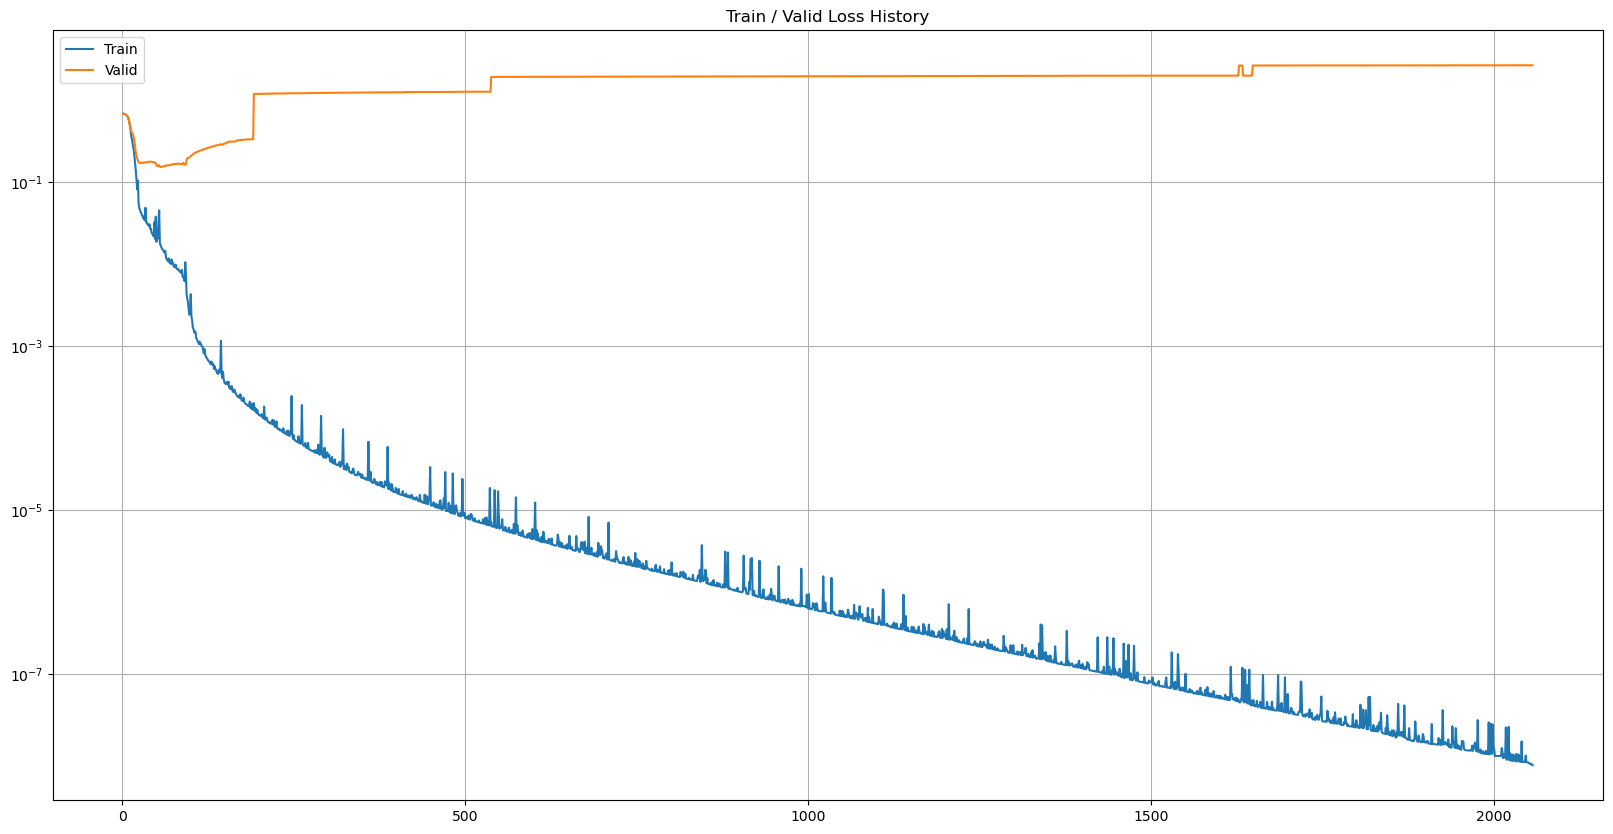

In [52]:
plot_from = 2

plt.figure(figsize=(20, 10))
plt.grid(True)
plt.title("Train / Valid Loss History")
plt.plot(range(plot_from, len(train_history)), train_history[plot_from:], label="Train")
plt.plot(range(plot_from, len(valid_history)), valid_history[plot_from:], label="Valid")

plt.legend()
plt.yscale('log')
plt.show()

# Let's see the result!


In [53]:
test_loss = 0
y_hat = []

with torch.no_grad():
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)
        
        test_loss += float(loss)
        y_hat += [y_hat_i]
        
test_loss = test_loss/len(x_)
y_hat = torch.cat(y_hat, dim=0)

print("Test loss: {:4f}".format(test_loss))

Test loss: 0.014089


In [54]:
correct_cnt = (y[2] == (y_hat > 0.5)).sum() # y_hat이 0.5보다 높으면 True이고 y[2]에서도 True인 것 즉, True Positive갯수
total_cnt = float(y[2].size(0))

print("Test Accuracy: {:.4f}".format(correct_cnt/total_cnt))

Test Accuracy: 1.0000


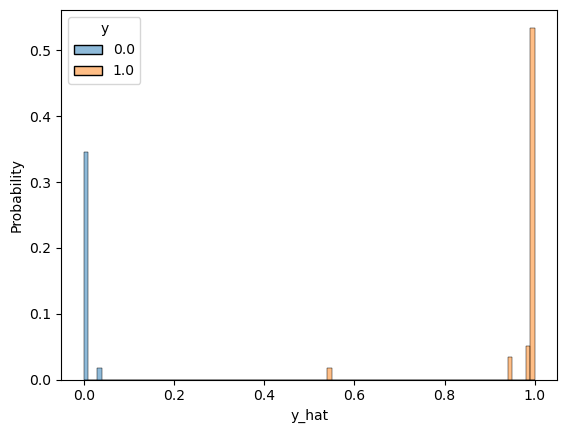

In [57]:
df = pd.DataFrame(torch.cat([y[2], y_hat], dim=1).detach().numpy(),
                  columns=["y", "y_hat"])

sns.histplot(df, x='y_hat', hue='y', bins=100, stat='probability')
plt.show()

# Area Under ROC

In [58]:
from sklearn.metrics import roc_auc_score

roc_auc_score(df.values[:, 0], df.values[:, 1]) #df는 바로 직전에 정답과 예측으로 재조정했으니 오해 말라구.

1.0